In [191]:
import numpy as np
import pandas as pd
import yfinance as yf

In [192]:
spy = yf.download(['SPY'], period = '5y')

[*********************100%***********************]  1 of 1 completed


In [193]:
price_returns = spy.pct_change()

In [194]:
price_returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-16,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-17,0.002950,0.001723,0.000074,-0.000845,-0.000845,0.048084
2018-05-18,-0.001177,-0.004392,-0.000738,-0.002500,-0.002500,0.138523
2018-05-21,0.005117,0.007168,0.006053,0.007519,0.007519,-0.098529
2018-05-22,0.003480,0.000985,-0.001211,-0.002780,-0.002780,-0.087194
...,...,...,...,...,...,...
2023-05-09,-0.004456,-0.002783,-0.001435,-0.004385,-0.004385,-0.016519
2023-05-10,0.006689,0.005945,-0.004432,0.004672,0.004672,0.953326
2023-05-11,-0.004663,-0.005090,0.002690,-0.001744,-0.001744,-0.270283


In [195]:
window = 12  # Number of months for momentum calculation
price_momentum = price_returns.rolling(window).sum()

In [196]:
price_momentum

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-16,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-05-09,-0.002253,-0.000995,0.001788,-0.002425,-0.002425,0.100166
2023-05-10,0.004921,0.004005,-0.003692,0.001204,0.001204,1.177717
2023-05-11,0.003681,0.003539,0.010153,0.015334,0.015334,0.387715


In [197]:
mean_factors = price_momentum.mean()
std_factors = price_momentum.std()

In [198]:
mean_factors

Open         0.004968
High         0.004657
Low          0.004821
Close        0.005098
Adj Close    0.005911
Volume       0.583416
dtype: float64

In [199]:
z_scores = (price_momentum - mean_factors) / std_factors

In [200]:
z_scores

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-16,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-05-09,-0.170039,-0.142787,-0.066907,-0.177957,-0.198507,-0.764759
2023-05-10,-0.001107,-0.016476,-0.187820,-0.092110,-0.112082,0.940500
2023-05-11,-0.030324,-0.028250,0.117662,0.242124,0.224402,-0.309702


In [201]:
z_scores['Adj Close'].mean()

-5.702590174639648e-18

In [202]:
#long basket
long_basket = z_scores[z_scores['Adj Close'] >= z_scores['Adj Close'].mean()]

# Print the filtered long basket
print(long_basket)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-06-04  0.179664  0.109310  0.153771  0.115966   0.097383 -0.072971
2018-06-05  0.154790  0.096992  0.145704  0.153159   0.134840  0.051423
2018-06-06  0.245853  0.390383  0.235214  0.410059   0.393471  0.191117
2018-06-07  0.309774  0.278481  0.201911  0.229654   0.211846  0.605293
2018-06-08  0.134647  0.250865  0.254178  0.365348   0.348450  0.725286
...              ...       ...       ...       ...        ...       ...
2023-04-24  0.121644  0.152212  0.150307  0.172592   0.154402 -0.666526
2023-04-27 -0.300415 -0.021203 -0.221028  0.044923   0.025873  0.267744
2023-04-28 -0.133050  0.116909  0.113253  0.343233   0.326192 -0.517935
2023-05-11 -0.030324 -0.028250  0.117662  0.242124   0.224402 -0.309702
2023-05-12  0.275078  0.249840  0.190954  0.311322   0.294065 -0.022984

[748 rows x 6 columns]


In [203]:
long_basket['Adj Close']

Date
2018-06-04    0.097383
2018-06-05    0.134840
2018-06-06    0.393471
2018-06-07    0.211846
2018-06-08    0.348450
                ...   
2023-04-24    0.154402
2023-04-27    0.025873
2023-04-28    0.326192
2023-05-11    0.224402
2023-05-12    0.294065
Name: Adj Close, Length: 748, dtype: float64

In [204]:
#short basket
short_basket = z_scores[z_scores['Adj Close'] < z_scores['Adj Close'].mean()]

# Print the filtered short basket
print(short_basket)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-06-21 -0.035538 -0.074418 -0.143325 -0.192376  -0.106710  0.983637
2018-06-22 -0.124490 -0.274255 -0.151254 -0.347014  -0.262390  0.264779
2018-06-25 -0.498550 -0.542197 -0.684787 -0.666460  -0.583982  2.397850
2018-06-26 -0.560366 -0.637335 -0.571767 -0.684019  -0.601652  1.620219
2018-06-27 -0.641858 -0.617603 -0.834549 -0.911440  -0.830615  2.754949
...              ...       ...       ...       ...        ...       ...
2023-05-05 -0.300497 -0.189447 -0.284360 -0.191237  -0.211876  0.483249
2023-05-08 -0.009004 -0.134773 -0.040631 -0.055846  -0.075574 -0.788343
2023-05-09 -0.170039 -0.142787 -0.066907 -0.177957  -0.198507 -0.764759
2023-05-10 -0.001107 -0.016476 -0.187820 -0.092110  -0.112082  0.940500
2023-05-15  0.190518 -0.063389  0.091773 -0.077984  -0.097860 -0.633913

[498 rows x 6 columns]


In [205]:
short_basket['Adj Close']

Date
2018-06-21   -0.106710
2018-06-22   -0.262390
2018-06-25   -0.583982
2018-06-26   -0.601652
2018-06-27   -0.830615
                ...   
2023-05-05   -0.211876
2023-05-08   -0.075574
2023-05-09   -0.198507
2023-05-10   -0.112082
2023-05-15   -0.097860
Name: Adj Close, Length: 498, dtype: float64

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

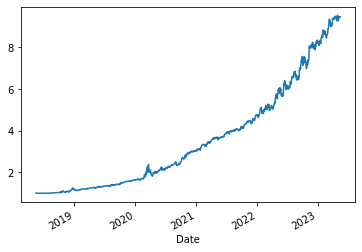

In [206]:
import yfinance as yf
import pandas as pd

# Step 1: Define the Trading Strategy

def my_strategy(data):
    # Implement your trading strategy rules here
    
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1

    return data


# Step 2: Obtain Historical Data

# Fetch historical data for SPY using 'yfinance'
data = yf.download('SPY', period='5y')['Adj Close'].to_frame()

# Step 3: Implement the Strategy

data_with_strategy = my_strategy(data.copy())

# Step 4: Performance Measurement

returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()

# Step 5: Analysis and Optimization
# ... Perform analysis and optimization as per your requirements ...

# Step 6: Visualization and Reporting

# Plot cumulative returns
cumulative_returns.plot()


In [207]:
cumulative_returns.head()

Date
2018-05-16    NaN
2018-05-17    1.0
2018-05-18    1.0
2018-05-21    1.0
2018-05-22    1.0
dtype: float64

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

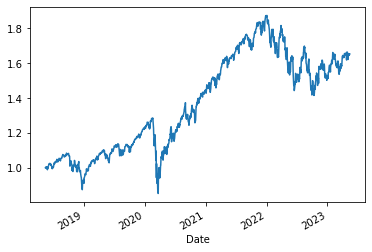

In [208]:
import yfinance as yf
import pandas as pd

# Step 1: Define the Trading Strategy

def my_strategy(data):
    # Implement your trading strategy rules here
    data['position'] = 1  # Set position to 1 (long position) for the entire duration
    
    return data


# Step 2: Obtain Historical Data

# Fetch historical data for SPY using 'yfinance'
data = yf.download('SPY', period='5y')['Adj Close'].to_frame()

# Step 3: Implement the Strategy

data_with_strategy = my_strategy(data.copy())

# Step 4: Performance Measurement

returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()

# Step 5: Analysis and Optimization
# ... Perform analysis and optimization as per your requirements ...

# Step 6: Visualization and Reporting

# Plot cumulative returns
cumulative_returns.plot()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

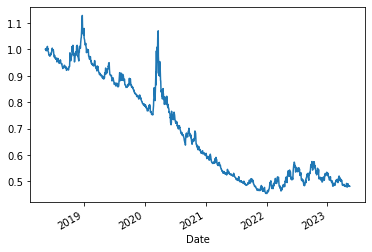

In [209]:
import yfinance as yf
import pandas as pd

# Step 1: Define the Trading Strategy

def my_strategy(data):
    data['position'] = -1  # Set position to -1 (short position) for the entire duration
    
    return data


# Step 2: Obtain Historical Data

data = yf.download('SPY', period='5y')['Adj Close'].to_frame()

# Step 3: Implement the Strategy

data_with_strategy = my_strategy(data.copy())

# Step 4: Performance Measurement

returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()

# Step 5: Visualization and Reporting

# Plot cumulative returns
cumulative_returns.plot()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


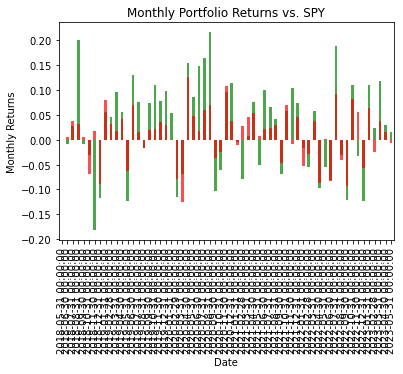

In [210]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the Trading Strategy

def my_strategy(data):
    
    # Example code snippet:
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1

    return data


# Step 2: Obtain Historical Data

spy_data = yf.download('SPY', period='5y')['Adj Close'].to_frame()
portfolio_data = yf.download('AAPL', period='5y')['Adj Close'].to_frame()  # Our portfolio

# Step 3: Implement the Strategy

spy_data_with_strategy = my_strategy(spy_data.copy())
portfolio_data_with_strategy = my_strategy(portfolio_data.copy())

# Step 4: Calculate Monthly Returns

spy_monthly_returns = spy_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
portfolio_monthly_returns = portfolio_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()

# Step 5: Create Bar Chart

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the monthly portfolio returns
portfolio_monthly_returns.plot(kind='bar', ax=ax, color='green', alpha=0.7)
spy_monthly_returns.plot(kind='bar', ax=ax, color='red', alpha=0.7)

# Set labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Returns')
ax.set_title('Monthly Portfolio Returns vs. SPY')

# Set positive and negative coloring
ax.bar(portfolio_monthly_returns[portfolio_monthly_returns >= 0].index,
       portfolio_monthly_returns[portfolio_monthly_returns >= 0],
       color='green', alpha=0.7)
ax.bar(portfolio_monthly_returns[portfolio_monthly_returns < 0].index,
       portfolio_monthly_returns[portfolio_monthly_returns < 0],
       color='red', alpha=0.7)

# Show the plot
plt.show()


In [211]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical data for AAPL using 'yfinance'
aapl_data = yf.download('AAPL', period='5y')['Adj Close']

# Calculate Z-score
z_score = (aapl_data - aapl_data.mean()) / aapl_data.std()

# Print the Z-score
print(z_score)


[*********************100%***********************]  1 of 1 completed
Date
2018-05-16   -1.299164
2018-05-17   -1.305335
2018-05-18   -1.308862
2018-05-21   -1.302016
2018-05-22   -1.304453
                ...   
2023-05-09    1.448263
2023-05-10    1.487064
2023-05-11    1.491182
2023-05-12    1.470778
2023-05-15    1.459925
Name: Adj Close, Length: 1258, dtype: float64


In [212]:
#If true is long
z_score.mean()>= z_scores['Adj Close'].mean()

True

In [216]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical data for AAPL using 'yfinance'
ms_data = yf.download('MS', period='5y')['Adj Close']

# Calculate Z-score
z_score2 = (ms_data - ms_data.mean()) / ms_data.std()

# Print the Z-score
print(z_score2)


[*********************100%***********************]  1 of 1 completed
Date
2018-05-16   -0.654014
2018-05-17   -0.657781
2018-05-18   -0.693566
2018-05-21   -0.676992
2018-05-22   -0.657404
                ...   
2023-05-09    0.952362
2023-05-10    0.924034
2023-05-11    0.876530
2023-05-12    0.866071
2023-05-15    0.890476
Name: Adj Close, Length: 1258, dtype: float64


In [217]:
#If true is short
z_score2.mean()< z_scores['Adj Close'].mean()

True

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


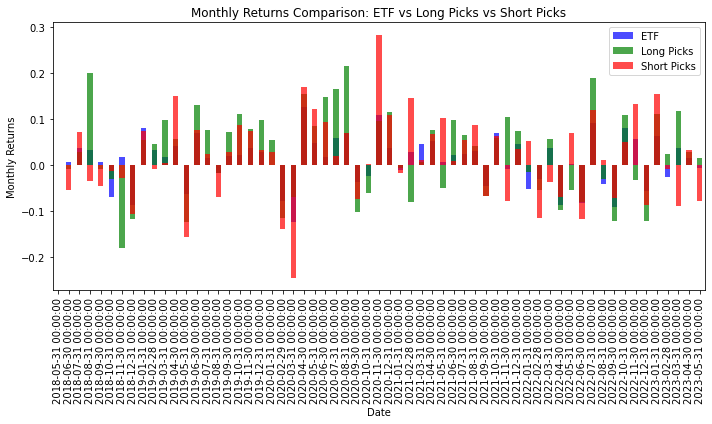

In [218]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the Trading Strategy

def my_strategy(data):
    
    # Example code snippet:
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1

    return data


# Step 2: Obtain Historical Data

# Fetch historical data for the ETF, long picks, and short picks using 'yfinance'
etf_data = yf.download('SPY', period='5y')['Adj Close'].to_frame()
long_picks_data = yf.download('AAPL', period='5y')['Adj Close'].to_frame()  # AAPL is long based on z score
short_picks_data = yf.download('MS', period='5y')['Adj Close'].to_frame()  # MS is short based on z score

# Step 3: Implement the Strategy

etf_data_with_strategy = my_strategy(etf_data.copy())
long_picks_data_with_strategy = my_strategy(long_picks_data.copy())
short_picks_data_with_strategy = my_strategy(short_picks_data.copy())

# Step 4: Calculate Monthly Returns

etf_monthly_returns = etf_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
long_picks_monthly_returns = long_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
short_picks_monthly_returns = short_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()

# Step 5: Create Bar Chart

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly returns
etf_monthly_returns.plot(kind='bar', ax=ax, color='blue', alpha=0.7)
long_picks_monthly_returns.plot(kind='bar', ax=ax, color='green', alpha=0.7)
short_picks_monthly_returns.plot(kind='bar', ax=ax, color='red', alpha=0.7)

# Set labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Returns')
ax.set_title('Monthly Returns Comparison: ETF vs Long Picks vs Short Picks')

ax.legend(['ETF', 'Long Picks', 'Short Picks'])

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


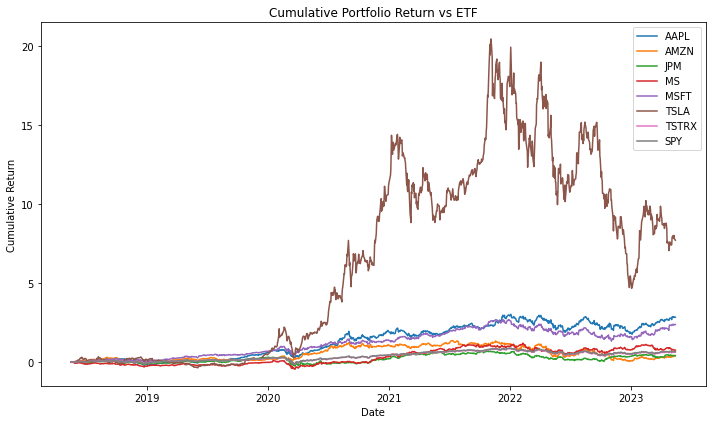

In [228]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Obtain Historical Data

# Fetch historical data for the portfolio and the ETF using 'yfinance'
portfolio_data = yf.download(['AAPL','MS', 'JPM','MSFT','TSLA','TSTRX','AMZN'], period='5y')['Adj Close']  # Replace 'STOCK1', 'STOCK2', 'STOCK3' with the symbols of your portfolio stocks
etf_data = yf.download('SPY', period='5y')['Adj Close']  # SPY' with the symbol of the ETF you want to compare

# Step 2: Calculate Cumulative Returns

portfolio_cumulative_returns = (portfolio_data.pct_change() + 1).cumprod() - 1
etf_cumulative_returns = (etf_data.pct_change() + 1).cumprod() - 1

# Step 3: Create Line Chart

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cumulative returns
ax.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label= portfolio_data[0:7])
ax.plot(etf_cumulative_returns.index, etf_cumulative_returns, label='SPY')

# Set labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Portfolio Return vs ETF')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
